<a href="https://colab.research.google.com/github/mirayinc/USArrest_linear_regression/blob/main/USArrest_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Gerekli kütüphaneleri aktardık
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('USArrests.csv')
df.head()
#veriler pandas ile okutuldu ve ilk beş tanesi listelendi


,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [ ]:
df.info()
#veri hakkında bilgi ediniyoruz
#daha etkili bir model için veri miktarı fazla olsaydı tes-train olarak bölecektik.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [ ]:
df.describe()
#pandas, veri seti içindeki sayısal değişkenlerin dağılımı
#temel istatistikleri görmek için kullanılır

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


**Bu tablodan çıkarımlar yapabiliriz.**

**Murder (Cinayet) Değişkeni:**

Ortalama cinayet oranı 7.8.
En düşük oran 0.8, en yüksek oran 17.4.
Standart sapma 4.4, bu da cinayet oranlarının ortalama etrafında dağıldığını gösterir.


**Assault (Saldırı) Değişkeni:**

Ortalama saldırı oranı 170.8.
Standart sapma yüksek (83.3), bu da saldırı oranlarının daha geniş bir aralıkta dağıldığını gösterir.


In [ ]:
df.isnull().sum()
#NaN değer kontrolü yaptık

,0
Unnamed: 0,0
Murder,0
Assault,0
UrbanPop,0
Rape,0


In [ ]:
X = df[['Assault', 'UrbanPop', 'Rape']]  # Bağımsız değişkenler
y = df['Murder']  # Bağımlı değişken

In [ ]:
model = LinearRegression()
#modelin oluşturulması
model.fit(X, y)
#modelin eğitilmesi

LinearRegression()

In [ ]:
print('Katsayılar:', model.coef_)
print('Sabit Terim:', model.intercept_)

""" model.coef_ eğitilmiş rg modelinin ağırlıklarını verecek
    model.intercept_ modelin sabit değerini verecek.
    modelin lineer regresyon olmasından dolayı
    matematiksel ifadesi ax1 + bx2 + cx3 + d = y """

Katsayılar: [ 0.03977717 -0.05469363  0.06139942]
Sabit Terim: 3.2766391800871304


' model.coef_ eğitilmiş rg modelinin ağırlıklarını verecek\n    model.intercept_ modelin sabit değerini verecek.\n    modelin lineer regresyon olmasından dolayı \n    matematiksel ifadesi ax1 + bx2 + cx3 + d = y '

In [ ]:
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Katsayı'])
coeff_df
#katsayıların hangi değişkenlere ait olduğunu görmek için

,Katsayı
Assault,0.039777
UrbanPop,-0.054694
Rape,0.061399


* 'Assault' ve 'Rape' suç oranları arttıkça, 'Murder' oranı da artma eğilimindedir.
* 'UrbanPop' yüzdesi arttıkça, 'Murder' oranı azalma eğilimindedir.

Bu durum, şehir nüfusunun yüksek olduğu bölgelerde cinayet oranlarının daha düşük olabileceğini gösterir.


In [ ]:
y_pred = model.predict(X)
#modelin tahmin yapması

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print('Mean Squared Error:', mse)
print('R^2 Skoru:', r2)
#modelin değerlendirilmesi için

Mean Squared Error: 6.096646006892495
R^2 Skoru: 0.672065642377039


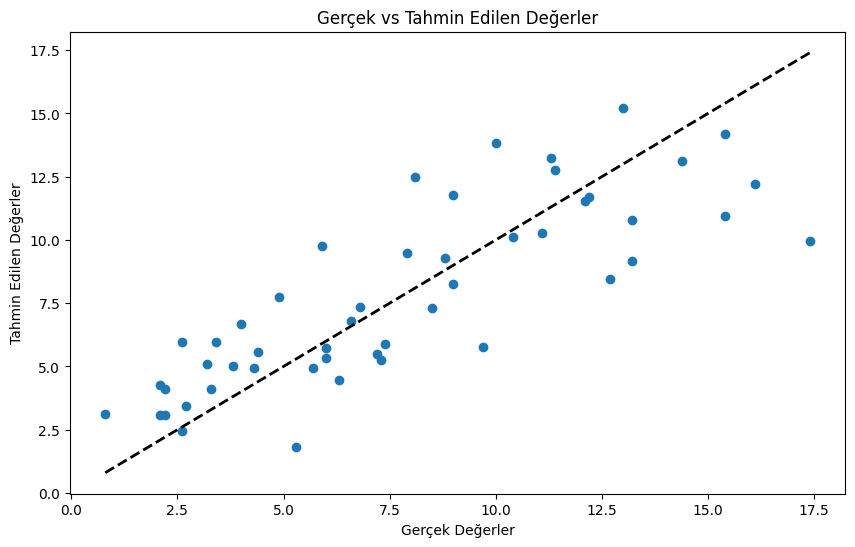

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(y, y_pred)
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.title('Gerçek vs Tahmin Edilen Değerler')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.show()
